In [1]:
# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [2]:
# Capitalises strings in list
def capitalise_list(list):
    capitalised_list = []
    for item in list:
        capitalised_list.append(item.capitalize())
    return capitalised_list

# Checks for impossible values 
def check_continuous_range(column_name, start_value, end_value):
    for item in column_name:
        if item < start_value or item > end_value:
            print('=== ' + column_name.name + '\n' +
                  column_name.name + " column contains values outside of " + str(start_value) + ' - ' + str(end_value))
            print('Current Min: ' + str(column_name.min()) + '\n' +
              'Current Max: ' + str(column_name.max()))
            break
            
# Compare list of makes without mistakes with another list and return any non-matches
def list_difference(incorrect_list, correct_list):
    return set(correct_list).difference(incorrect_list)

# Removes whitespaces and lowercase all letters in a string
def strip_and_lowercase(column_name):
    automobile[column_name] = automobile[column_name].str.strip()
    automobile[column_name] = automobile[column_name].str.lower()

## Data Retrieval

In [3]:
# Automobile CSV Path (same directory)
automobile_csv = './Automobile.csv'

# Variables
headings = ['symboling:', 'normalized-losses:', 'make:', 'fuel-type:', 
                             'aspiration:', 'num-of-doors:', 'body-style:', 'drive-wheels:', 
                             'engine-location:', 'wheel-base:', 'length:', 'width:', 'height:', 
                             'curb-weight:', 'engine-type:', 'num-of-cylinders:', 'engine-size:', 
                             'fuel-system:', 'bore:', 'stroke:', 'compression-ratio:', 'horsepower:', 
                             'peak-rpm:', 'city-mpg:', 'highway-mpg:', 'price:']

correct_make_list = ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
                            'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
                            'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche',
                            'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']

correct_fuel_list = ['gas', 'diesel']
correct_aspiration_list = ['std', 'turbo']  
correct_doors_list = ['four', 'two']
correct_body_style_list = ['hardtop', 'wagon', 'sedan', 'hatchback', 'convertible']
correct_drive_wheels_list = ['4wd', 'fwd', 'rwd']
correct_engine_type_list = ['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor']
correct_number_cylinders_list = ['eight', 'five', 'four', 'six', 'three', 'twelve', 'two']
correct_fuel_system_list = ['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi']

# Load data and check whether data is equivalent to CSV source
automobile = pd.read_csv(automobile_csv)

# Read and structure CSV automobile file 
automobile = pd.read_csv(automobile_csv, sep='#', decimal='.', header=None, names = capitalise_list(headings))

# Check the data types
print automobile.dtypes

automobile.head(5)

Symboling:              int64
Normalized-losses:    float64
Make:                  object
Fuel-type:             object
Aspiration:            object
Num-of-doors:          object
Body-style:            object
Drive-wheels:          object
Engine-location:       object
Wheel-base:           float64
Length:               float64
Width:                float64
Height:               float64
Curb-weight:            int64
Engine-type:           object
Num-of-cylinders:      object
Engine-size:            int64
Fuel-system:           object
Bore:                 float64
Stroke:               float64
Compression-ratio:    float64
Horsepower:           float64
Peak-rpm:             float64
City-mpg:               int64
Highway-mpg:            int64
Price:                float64
dtype: object


,Symboling:,Normalized-losses:,Make:,Fuel-type:,Aspiration:,Num-of-doors:,Body-style:,Drive-wheels:,Engine-location:,Wheel-base:,...,Engine-size:,Fuel-system:,Bore:,Stroke:,Compression-ratio:,Horsepower:,Peak-rpm:,City-mpg:,Highway-mpg:,Price:
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Data Preparation

In [4]:
# Check for NaN and replace them with the mean of its corresponding column
automobile.isnull().sum()
if automobile.isnull().values.any():
    automobile.fillna(automobile.mean(), inplace=True)    
    #Round 'Normalized-losses:' back to original number of decimal places. Since values are relatively high, inaccurancy introduction is negligible.
    automobile['Normalized-losses:'] = automobile['Normalized-losses:'].round(1)
    #Drop Remaining NaN (in door handle column). If other NaN values existed, would address them individually
    automobile.dropna(inplace=True)
automobile

# Symboling should have a range of -3 to +3. Fix those that are outside this range.
automobile.loc[automobile['Symboling:'] > 3, 'Symboling:'] = 3
automobile.loc[automobile['Symboling:'] < -3, 'Symboling:'] = -3
        
# Find Mistakes in Normalized-losses: continuous from 65 to 256.
check_continuous_range(automobile['Normalized-losses:'], 65, 256)
automobile.loc[automobile['Normalized-losses:'] > 256, 'Normalized-losses:'] = 256
automobile.loc[automobile['Normalized-losses:'] < 65, 'Normalized-losses:'] = 65
# automobile['Normalized-losses:'].plot(kind='box')
    
# Strip strings with whitespace and convert all to lowercase letters
automobile['Make:'] = automobile['Make:'].str.strip()
automobile['Make:'] = automobile['Make:'].str.lower()

# Find mistakes in Make
automobile_make_list = []
for make in automobile['Make:']:
    automobile_make_list.append(make)
list_difference(automobile_make_list, correct_make_list)

# Overwrite typo with correct value & check the applied fix
automobile.loc[automobile['Make:'] == 'vol00112ov', 'Make:'] = 'volvo'
automobile['Make:'].value_counts()

# Compare Fuel-type list with a correctly prepared fuel-type list & show the difference between (i.e, mistakes)
automobile_fuel_list = []
for fuel in automobile['Fuel-type:']:
    automobile_fuel_list.append(fuel)
list_difference(automobile_fuel_list, correct_fuel_list)

strip_and_lowercase('Fuel-type:')
automobile['Fuel-type:'].value_counts()

# Find mistakes in Aspirations & check the applied fix
strip_and_lowercase('Aspiration:')
automobile.loc[automobile['Aspiration:'] == 'turrrrbo', 'Aspiration:'] = 'turbo'
automobile['Aspiration:'].value_counts()

# Find mistakes in Number of doors & check the applied fix
strip_and_lowercase('Num-of-doors:')
automobile.loc[automobile['Num-of-doors:'] == 'fourr', 'Num-of-doors:'] = 'four'
automobile['Num-of-doors:'].value_counts()

# Find mistakes in Body-style & check the applied fix
strip_and_lowercase('Body-style:')
automobile['Body-style:'].value_counts()

# Find mistakes in drive-wheels & check the applied fix
strip_and_lowercase('Drive-wheels:')
automobile['Drive-wheels:'].value_counts()

# Find mistakes in engine-location & check the applied fix
strip_and_lowercase('Engine-location:')
automobile['Engine-location:'].value_counts()

# Find mistakes in wheel-base. Continuous from 86.6 to 120.9.
check_continuous_range(automobile['Wheel-base:'], 86.6, 120.9)
# automobile['Wheel-base:'].plot(kind='box')

# Find mistakes in length. Continuous from 141.1 to 208.1.
check_continuous_range(automobile['Length:'], 141.1, 208.1)
# automobile['Length:'].plot(kind='box')

# Find mistakes in width. Continuous from 60.3 to 72.3.
check_continuous_range(automobile['Width:'], 60.3, 72.3)
# automobile['Width:'].plot(kind='box')

# Find mistakes in height. Continuous from 47.8 to 59.8.
check_continuous_range(automobile['Height:'], 47.8, 59.8)
# automobile['Height:'].plot(kind='box')

# Find mistakes in curb-weight. Continuous from 1488 to 4066.
check_continuous_range(automobile['Curb-weight:'], 1488, 4066)
# automobile['Curb-weight:'].plot(kind='box')

# Find mistakes in engine-type. Types are dohc, dohcv, l, ohc, ohcf, ohcv, rotor
# Add all column values to list and compares it with a correctly prepared list. Show the difference between them (i.e, mistakes)
strip_and_lowercase('Engine-type:')
automobile_engine_type_list = []
for engine in automobile['Engine-type:']:
    automobile_engine_type_list.append(engine)
list_difference(automobile_engine_type_list, correct_engine_type_list) # -> No typos found
automobile['Engine-type:'].value_counts()

# Find mistakes in num-of-cylinders. Correct are eight, five, four, six, three, twelve, two
strip_and_lowercase('Num-of-cylinders:')
automobile['Num-of-cylinders:'].value_counts()

# Find mistakes in engine-size. Continuous from 61 to 326.
# print_min_max_values('Engine-size:') 
check_continuous_range(automobile['Engine-size:'], 61, 326)
# automobile['Engine-size:'].plot(kind='box')

# Find mistakes in fuel-system. Systems are 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi
strip_and_lowercase('Fuel-system:')
automobile_fuel_system_list = []
for system in automobile['Fuel-system:']:
    automobile_fuel_system_list.append(system)
list_difference(automobile_fuel_system_list, correct_fuel_system_list) # -> No typos found
automobile['Fuel-system:'].value_counts()

# Find mistakes in bore. Continuous from 2.54 to 3.94.
check_continuous_range(automobile['Bore:'], 2.54, 3.94)
# automobile['Bore:'].plot(kind='box')

# Find mistakes in stroke. Continuous from 2.07 to 4.17.
check_continuous_range(automobile['Stroke:'], 2.07, 4.17)
# automobile['Stroke:'].plot(kind='box')

# Find mistakes in compression-ratio. Continuous from 7 to 23.
check_continuous_range(automobile['Compression-ratio:'], 7, 23)

# Find mistakes in horsepower. Continuous from 48 to 288.
check_continuous_range(automobile['Horsepower:'], 48, 288)
# automobile['Horsepower:'].plot(kind='box')

# Find mistakes in peak-rpm. Continuous from 4150 to 6600.
check_continuous_range(automobile['Peak-rpm:'], 4150, 6600)
# automobile['Peak-rpm:'].plot(kind='box')

# Find mistakes in city-mpg. Continuous from 13 to 49.
check_continuous_range(automobile['City-mpg:'], 13, 49)
# automobile['City-mpg:'].plot(kind='box')

# Find mistakes in highway-mpg. Continuous from 16 to 54.
check_continuous_range(automobile['Highway-mpg:'], 16, 54)
# automobile['Highway-mpg:'].plot(kind='box')

# Find mistakes in price. Continuous from 5118 to 45400.
check_continuous_range(automobile['Price:'], 5118, 45400)
# automobile['Price:'].plot(kind='box')

# Get automobile prices with value 0
all_price_errors = automobile[automobile['Price:'] == 0]

# Get all unique price errors (remove duplicates - easy readability)
unique_price_errors = all_price_errors.drop_duplicates() 

# Ignore price column
unique_errors_without_price_column = unique_price_errors.loc[:, unique_price_errors.columns != 'Price:']

# Find all rows that have the EXACT same specification as those with the price of 0
all_matching_rows = pd.merge(automobile, unique_errors_without_price_column, on=headings.remove('price:'))

# Drop duplicates (For readability purposes)
all_matching_rows.drop_duplicates()

# Fix price errors (with price of EXACT same automobile specifications)
automobile.loc[((automobile['Make:'] == 'volvo') & 
                (automobile['Price:'] == 0) & 
                (automobile['Engine-size:'] == 145) & 
                (automobile['Bore:'] == 3.01)), 'Price:'] = 22470

automobile.loc[((automobile['Make:'] == 'volvo') & 
                (automobile['Price:'] == 0) & 
                (automobile['Engine-size:'] == 141) & 
                (automobile['Bore:'] == 3.78)), 'Price:'] = 22625

# Round price to 1 decimal place
automobile['Price:'] = automobile['Price:'].round(1)

# Get automobile prices with value 0 (With fixes applied).
automobile[automobile['Price:'] == 0]

automobile

=== Normalized-losses:
Normalized-losses: column contains values outside of 65 - 256
Current Min: 25.0
Current Max: 256.0
=== Price:
Price: column contains values outside of 5118 - 45400
Current Min: 0.0
Current Max: 45400.0


,Symboling:,Normalized-losses:,Make:,Fuel-type:,Aspiration:,Num-of-doors:,Body-style:,Drive-wheels:,Engine-location:,Wheel-base:,...,Engine-size:,Fuel-system:,Bore:,Stroke:,Compression-ratio:,Horsepower:,Peak-rpm:,City-mpg:,Highway-mpg:,Price:
0,3,116.9,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,3,116.9,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,1,116.9,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,2,116.9,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,1,116.9,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,0,116.9,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,13696.1


## Data Exploration

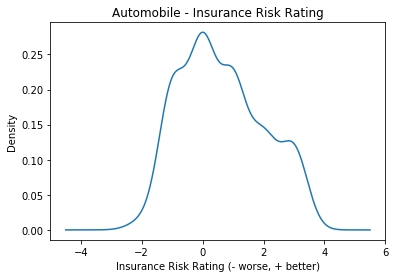

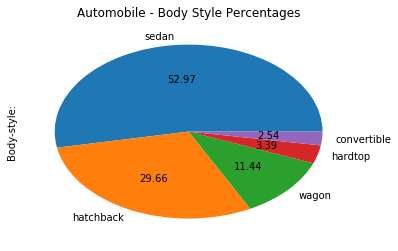

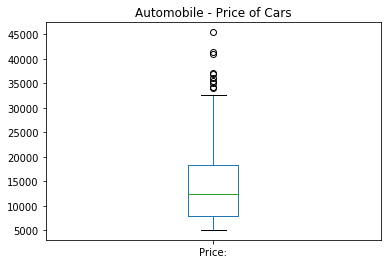

In [5]:
# Variables
symboling_column = automobile['Symboling:']
body_style_column = automobile['Body-style:']
price_column = automobile['Price:']

# === Check for problems and anomalies for selected columns ===

# Check for NaN
automobile.isnull().sum()

# Check for incorrect symboling
check_continuous_range(symboling_column, -3, 3)

# Check for body-style errors        
automobile_body_style_list = []
for style in automobile['Body-style:']:
    automobile_body_style_list.append(style)

if bool(list_difference(automobile_body_style_list, correct_body_style_list)):
    print("Body-style column contains values outside of range")
    
# Check for incorrect prices
check_continuous_range(price_column, 5118, 45400)

# === Column Visualisation ===

# Symboling column visualisation
plt.figure()
symboling_column.plot(kind='density')
plt.title('Automobile - Insurance Risk Rating')
plt.xlabel('Insurance Risk Rating (- worse, + better)')
plt.ylabel('Density')

# Body-style column visualisation
plt.figure()
plt.title('Automobile - Body Style Percentages')
body_style_column.value_counts().plot(kind='pie', autopct='%.2f')

# Price column visualisation
plt.figure()
plt.title('Automobile - Price of Cars')
price_column.plot(kind='box')

plt.show()

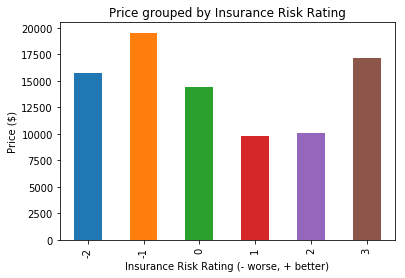

<Figure size 432x288 with 0 Axes>

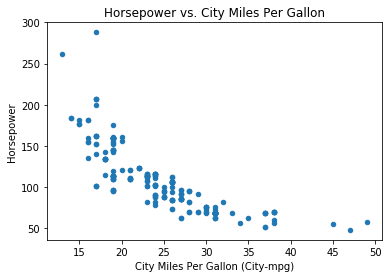

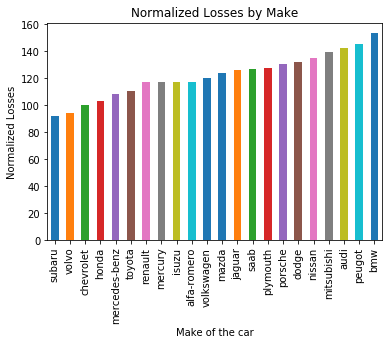

In [6]:
# Pair 1: Price/Symboling
# Hypothesis:- Higher prices negatively affects the insurance risk rating
plt.figure()
# Plot a bar graph with symboling (Insurance Risk Rating) as the x-value and price as the y-value
automobile.groupby(['Symboling:'])['Price:'].mean().plot.bar()
plt.suptitle('')
plt.title('Price grouped by Insurance Risk Rating')
plt.ylabel('Price ($)')
plt.xlabel('Insurance Risk Rating (- worse, + better)')

# Pair 2: Horsepower/City-mpg
# Hypothesis:- Higher horsepower decreases the city miles per gallon
plt.figure()
# Plot a scatterplot with city-mpg as the x-value and horsepower as the y-value
automobile.plot(kind='scatter', x='City-mpg:', y='Horsepower:')
plt.title('Horsepower vs. City Miles Per Gallon')
plt.ylabel('Horsepower')
plt.xlabel('City Miles Per Gallon (City-mpg)')

# Pair 3: Make/Normalized-losses
# Hypothesis:- The make of an automobile affects normalized losses
plt.figure()
# Plot bar graph with Make as the x-value and Normalized-losses as the y-value
automobile.groupby(['Make:'])['Normalized-losses:'].mean().sort_values().plot.bar()
plt.title('Normalized Losses by Make')
plt.ylabel('Normalized Losses')
plt.xlabel('Make of the car')

plt.show()

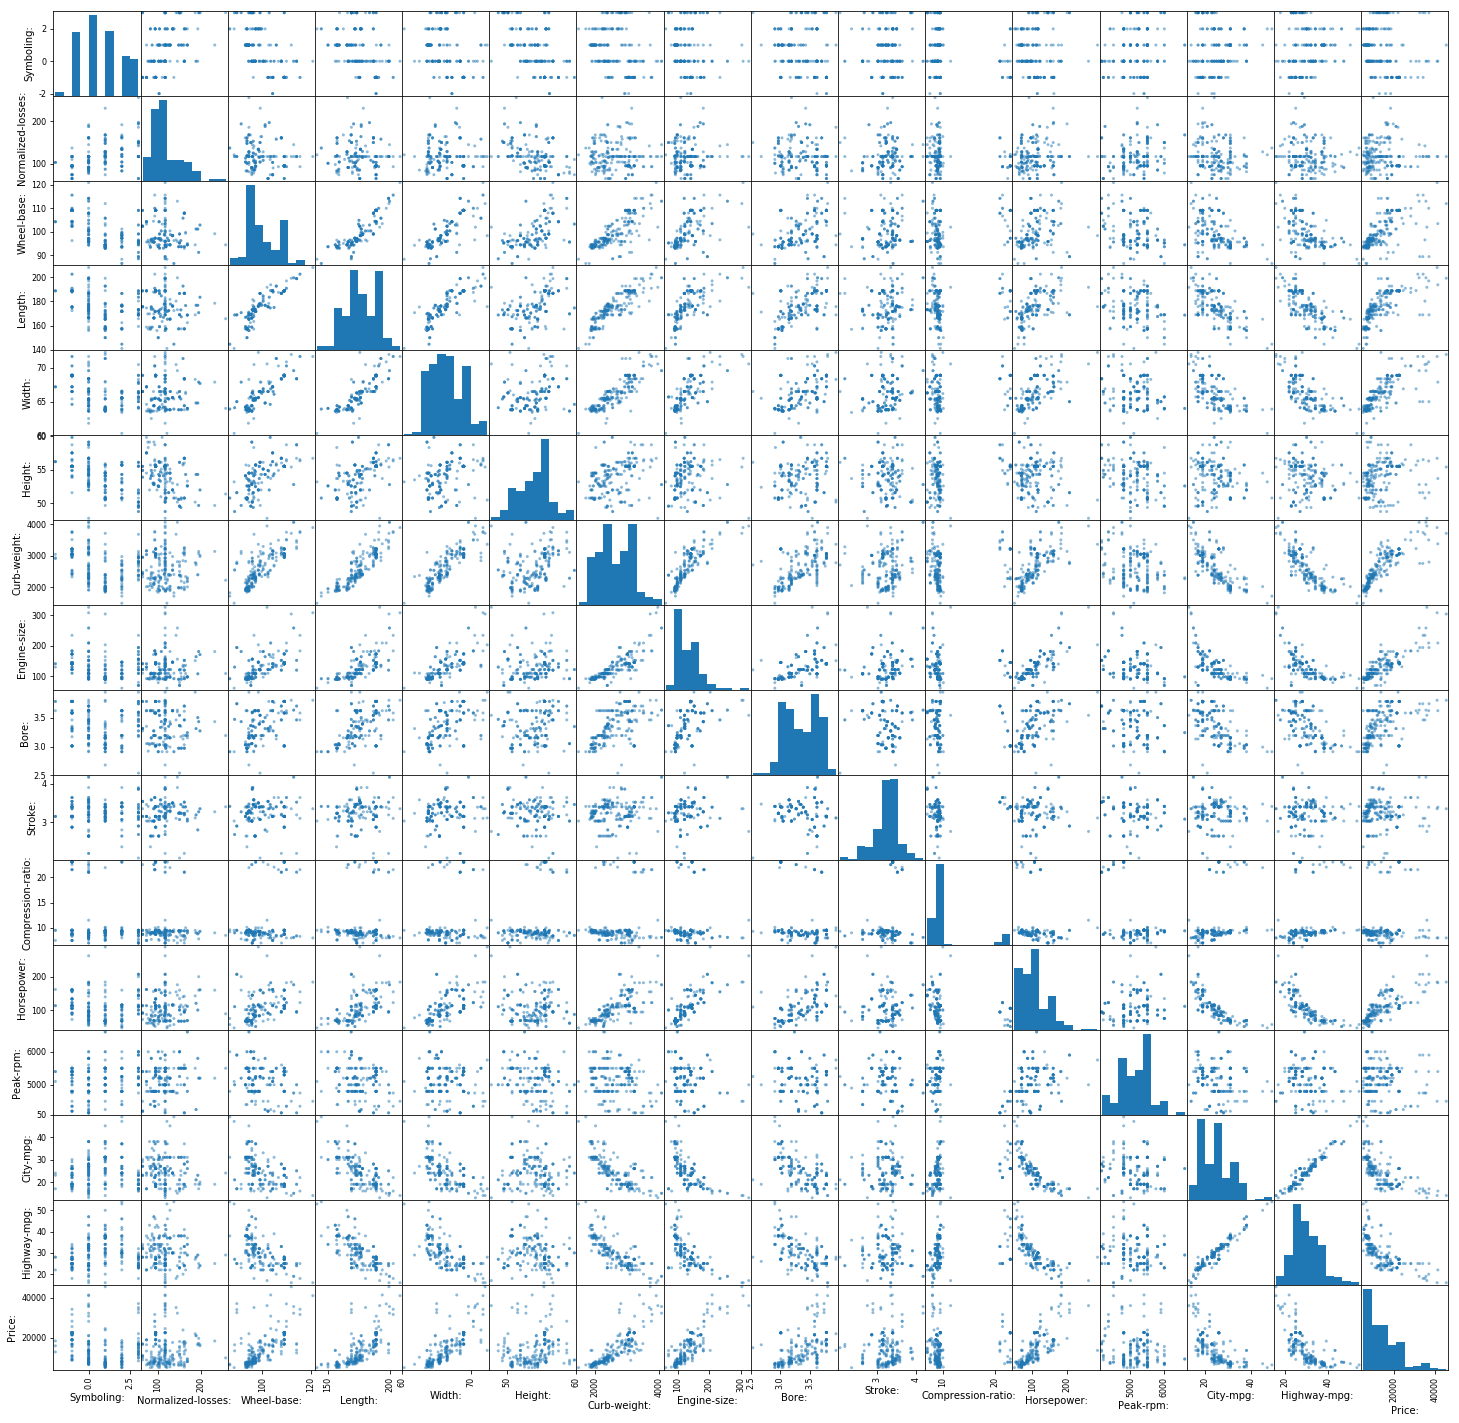

In [7]:
# Load Library
from pandas.plotting import scatter_matrix

# Plot scatter matrix of automobile dataset 
scatter_matrix(automobile, figsize=(25,25), alpha = 0.5, diagonal='hist')
plt.show()